In [29]:
import numpy as np
import pandas as pd

path = 'stardata.csv'

df = pd.read_csv(path)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [31]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


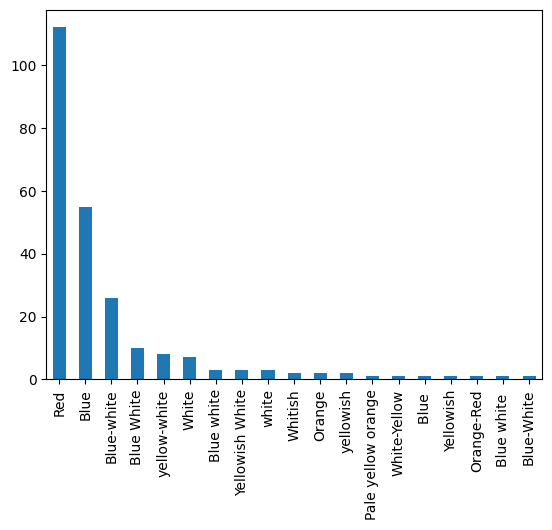

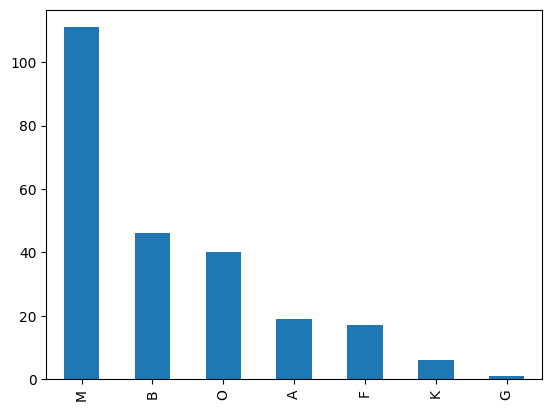

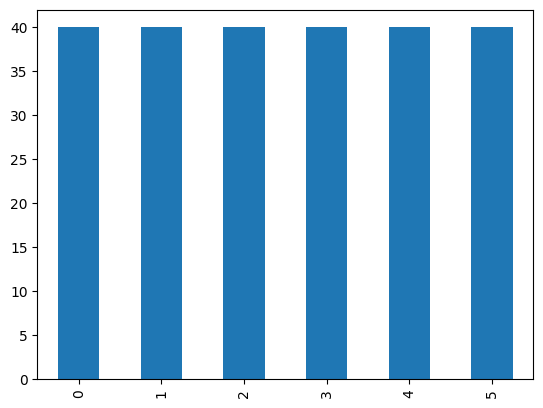

In [32]:
import matplotlib.pyplot as plt

#Plot class frequencies
df['Star color'].value_counts().plot(kind='bar')
plt.show()

df['Spectral Class'].value_counts().plot(kind='bar')
plt.show()

df['Star type'].value_counts().plot(kind='bar')
plt.show()

In [33]:
#Category type conversion
df['Spectral Class'] = df['Spectral Class'].astype('category')
df['Star color'] = df['Star color'].astype('category')
df['Star type'] = df['Star type'].astype('category')

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#Change this to change prediction value
target_value = 'Spectral Class'

feat = df.drop(target_value, axis=1)
targ = df[target_value]

X_train, X_test, Y_train, Y_test = train_test_split(feat, targ, test_size=.2)

In [35]:
#Encode categorical column for xgboost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [36]:
#Train model with gpu_hist tree model
model = XGBClassifier(tree_method="gpu_hist", enable_categorical=True)
model.fit(X_train, Y_train)
model.save_model('model1.json')

In [37]:
#Create prediction
expected = Y_test
predicted = model.predict(X_test)
predicted = le.inverse_transform(predicted)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      0.92      0.96        12
           F       1.00      1.00      1.00         4
           K       1.00      0.50      0.67         2
           M       0.96      1.00      0.98        22
           O       0.83      1.00      0.91         5

    accuracy                           0.96        48
   macro avg       0.96      0.90      0.92        48
weighted avg       0.96      0.96      0.96        48



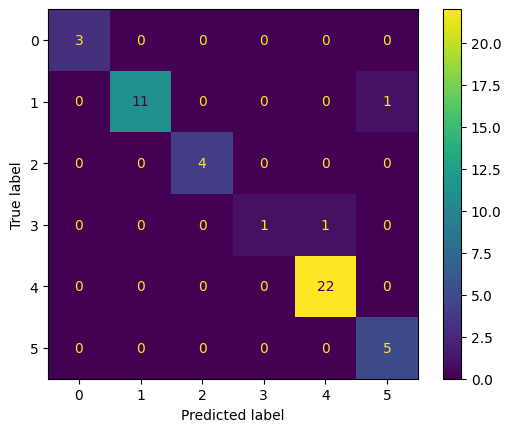

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Prediction analysis
print(classification_report(expected, predicted, zero_division=1))
disp = ConfusionMatrixDisplay(confusion_matrix(expected, predicted))
disp.plot()